# Problem Statement : 
## HEART DISEASE PREDICTION 

### Importing necessary libraries and The Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/Users/nilanjannath/Desktop/Data Science Christ/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Attributes and their meanings

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

### Let's take a look at the dataset 

In [3]:
df.shape

(303, 14)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Exploratory Data Analysis

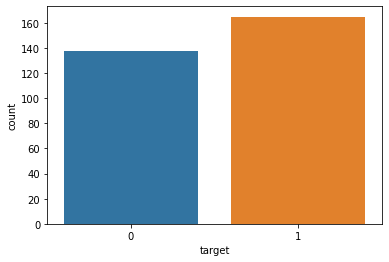

In [7]:
sns.countplot(x='target',data=df)

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Interpretations :
    1. The above plot confirms the findings that -
    2. There are 165 patients suffering from heart disease, and
    3. There are 138 patients who do not have any heart disease.
### So this is a pretty much balanced dataset

In [9]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

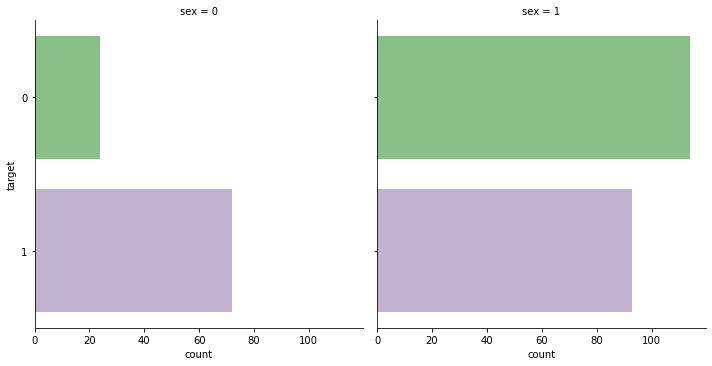

In [10]:
## We can visualize the value counts of the sex variable wrt target as follows -
ax = sns.catplot(y="target", col="sex", data=df, kind="count", height=5,  palette="Accent")

### Interpretations :
We can see that the values of target variable are plotted wrt sex : (1 = male; 0 = female).

target variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

The above plot confirms our findings that -
1. Out of 96 females - 72 have heart disease and 24 do not have heart disease.
2. Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

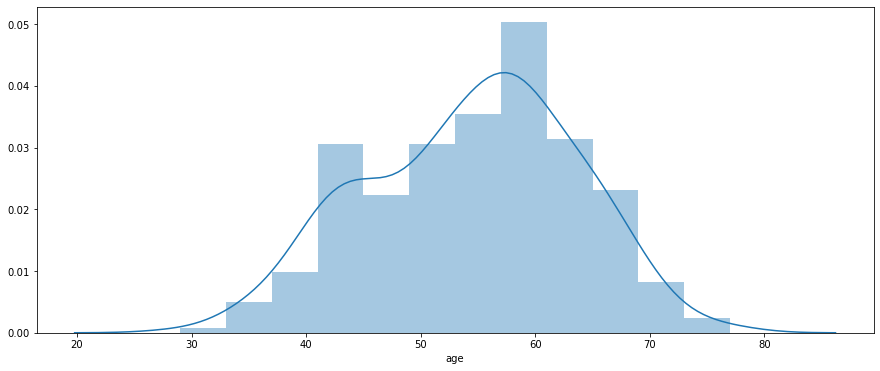

In [11]:
plt.figure(figsize=(15,6))
sns.distplot(df['age'])
plt.show()

### Interpretation :
The age is mostly normally distributed

### Effect of AGE on Heart Disease

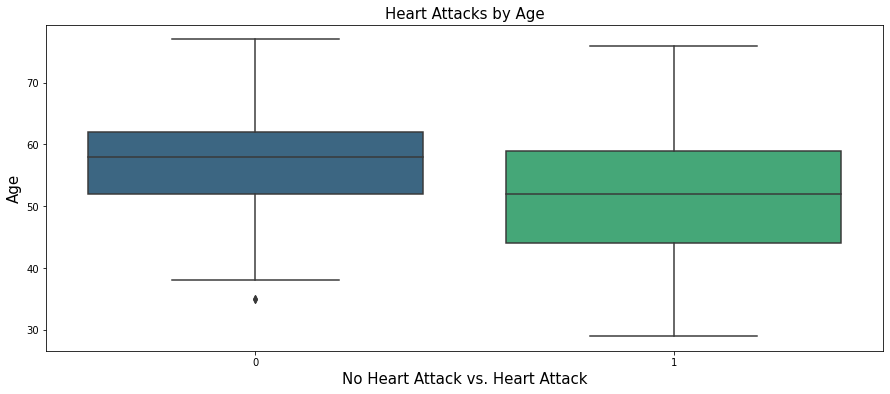

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(x='target',y='age',data=df,palette='viridis')
plt.title('Heart Attacks by Age',size=15)
plt.xlabel('No Heart Attack vs. Heart Attack',size=15)
plt.ylabel('Age',size=15);

### Interpretation :
Median Age of patients with no heart attacks is higher.
50-60 years of age is the most crucial year in terms of heart disease.

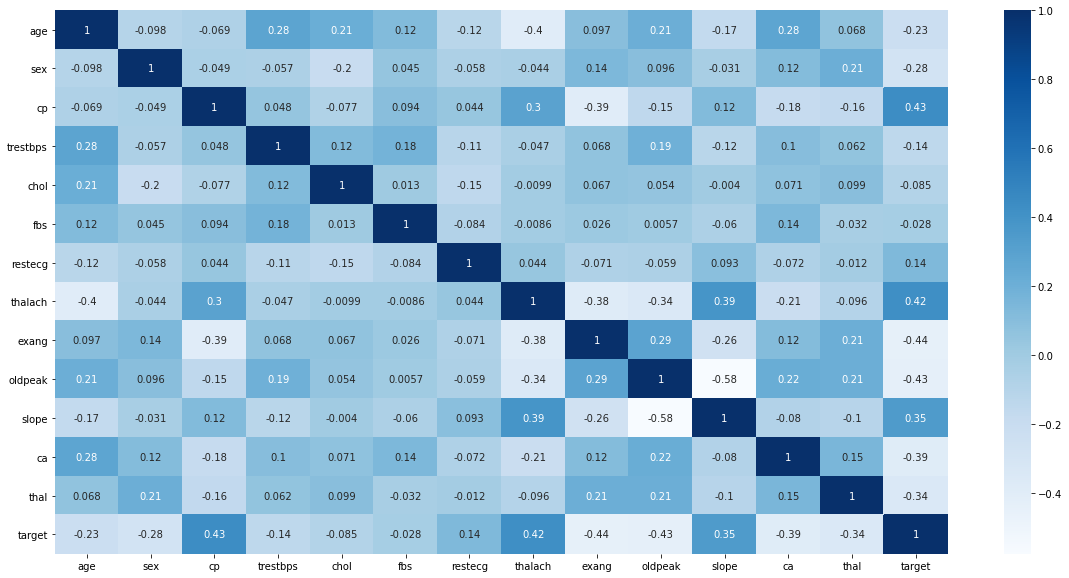

In [13]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="Blues",annot=True)

### Interpretations:
From this correlation we can conclude that chol and fbs don't have any major impact on cardiac problems.
Except these two features all the other features are contributing towards heart disease to a certain extent.

## Analysis of target vs cp

In [14]:
##Now, I will view its frequency distribution as follows :
df['cp'].value_counts()
##It can be seen that cp is a categorical variable and it contains 4 types of values - 0, 1, 2 and 3.

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

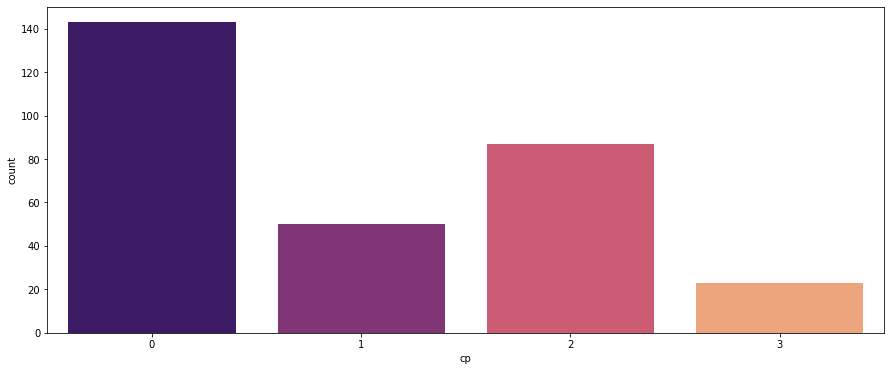

In [15]:
##Visualize the frequency distribution of cp variable
plt.figure(figsize=(15,6))
sns.countplot(x="cp", data=df, palette="magma")
plt.show()

In [16]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

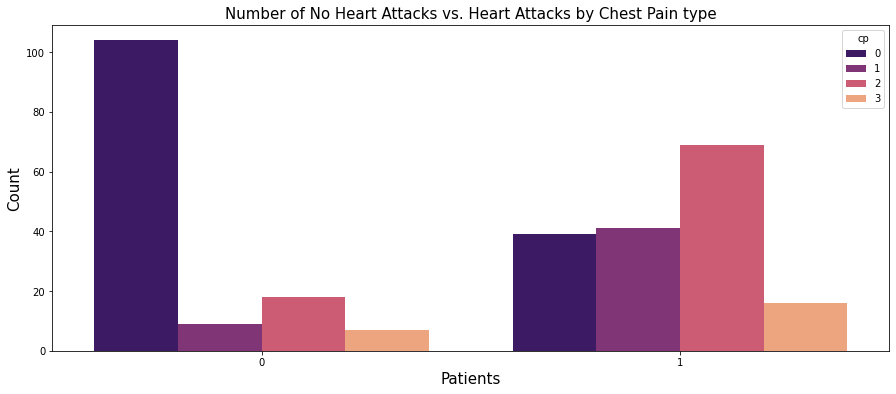

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='target',data=df,palette='magma',hue='cp')
plt.title('Number of No Heart Attacks vs. Heart Attacks by Chest Pain type',size=15)
plt.xlabel('Patients',size=15)
plt.ylabel('Count',size=15);


### Interpretations :
There are four types of chest pains.
Chest pain type 0 had less heart attack occurences. It also had the most patients with no heart attacks.
Chest pain type 2 had most heart attack occurences. 
Chest pain type 3 had least heart attack occurences.

So we can conclude that most of the heart attacks are caused by chest pain type 2 .

## Analysis of target vs thalach

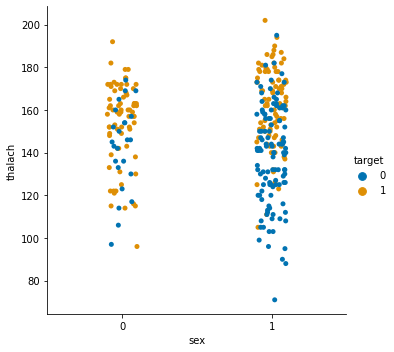

In [18]:
sns.catplot(data = df, x = 'sex', y = 'thalach', palette = 'colorblind', hue = 'target')

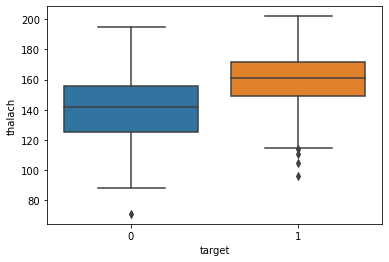

In [19]:
sns.boxplot(x="target", y="thalach", data=df)
plt.show()

### Interpretation :
We can see that those people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

This is a symptom called Trachycardia.

## Analysis of target vs exang

In [20]:
df.groupby('exang')['target'].value_counts()

exang  target
0      1         142
       0          62
1      0          76
       1          23
Name: target, dtype: int64

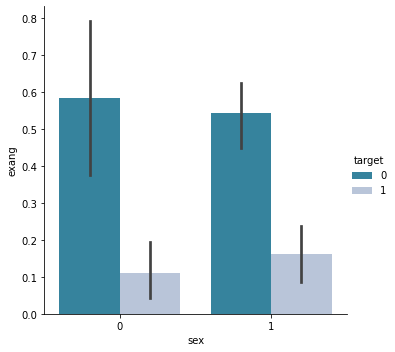

In [21]:
sns.catplot(kind = 'bar', data = df, y = 'exang', x = 'sex', hue = 'target',palette='PuBuGn_r')
plt.show()

### Interpretation :
there is an increased level of exang in men. this might be leading to heart disease in men.

### Effect of FBS on Heart Disease

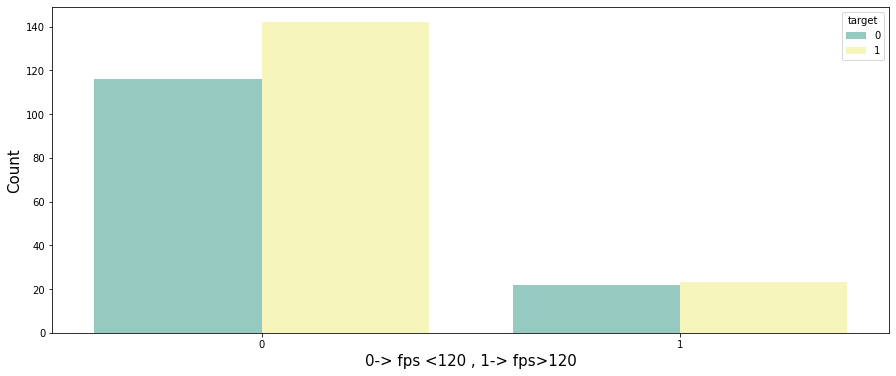

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(x='fbs',data=df,palette='Set3',hue='target')
plt.xlabel('0-> fps <120 , 1-> fps>120',size=15)
plt.ylabel('Count',size=15);


### Interpretation :
People having fps < 120 have more chance of having Heart Disease than people havnig fps >120

### Effect of RESTECG on Heart Disease

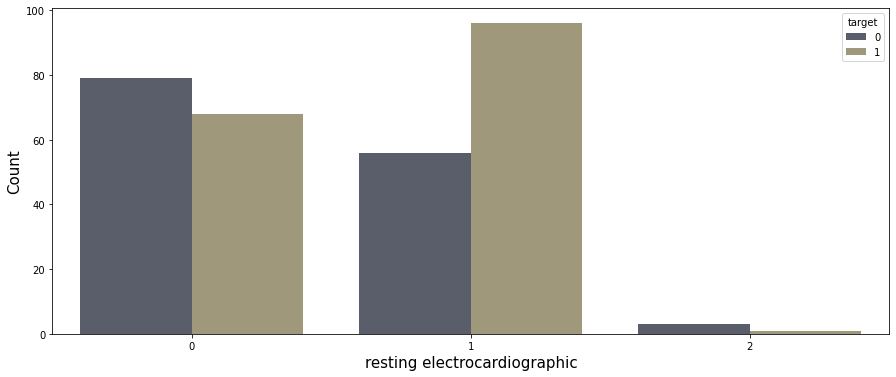

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(x='restecg',data=df,palette='cividis',hue='target')
plt.xlabel('resting electrocardiographic',size=15)
plt.ylabel('Count',size=15);


### Interpretation :
An electrocardiogram (ECG) is a test which measures the electrical activity of your heart to show whether or not it is working normally. An ECG records the heart's rhythm and activity on a moving strip of paper or a line on a screen. 
 
With above graph as a refrence we can say that if resting electrocardiographic is 1 i.e. having ST-T wave abnormality then the person has more chances of suffering from Heart Disease.

### Effect of SLOPE on Heart Disease

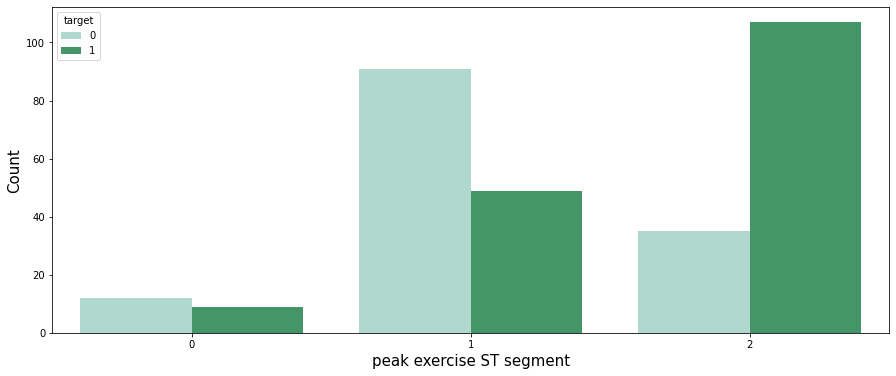

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(x='slope',data=df,palette='BuGn',hue='target')
plt.xlabel('peak exercise ST segment',size=15)
plt.ylabel('Count',size=15);


### Interpretation :
Feature (the peak exercise ST segment slope) has three symbolic values (flat,downsloping,upsloping)

Therefore People having up sloping are more prone to Heart Disease than flat and downsloping. 

<Figure size 1080x432 with 0 Axes>

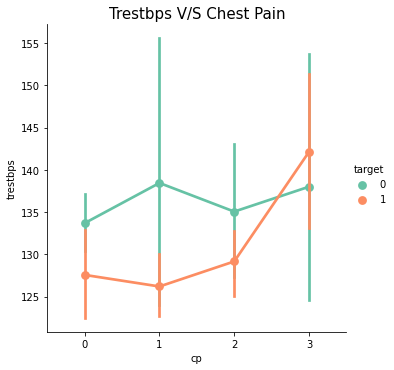

In [25]:
plt.figure(figsize=(15,6))
sns.factorplot(y='trestbps',data=df,x='cp',hue='target',palette='Set2')
plt.title('Trestbps V/S Chest Pain',size=15);

### Interpretation :
As Chest pain increases Blood Pressure will also increase along with the chances of Heart Disease.

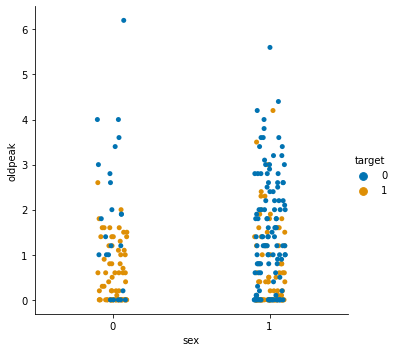

In [26]:
sns.catplot(data = df, x = 'sex', y = 'oldpeak', palette = 'colorblind', hue = 'target');

### Interpretation :
Based on the above plot we can conclude that if Old peak is less than 2 then people will have more chances of having heart disease.

# Model Building

# Logistic Regression :
Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.

This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function


## Splitting Train and Test data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = df.drop('target',axis=1)
y = df['target']

In [29]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.30, random_state=40)

In [30]:
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((212, 13), (91, 13), (212,), (91,))

### Standard Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)

X_test_scaled = scaler.transform(x_cv)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Initialize Model

In [34]:
model = LogisticRegression(random_state=40)

### Fitting train data into model

In [35]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=40)

### Predicting Accuracy

In [36]:
pred_cv = model.predict(X_test_scaled)

In [37]:
accuracy_score(y_cv, pred_cv)

0.9230769230769231

### Confusion Matrix

[[35  5]
 [ 2 49]]


Text(33.0, 0.5, 'True')

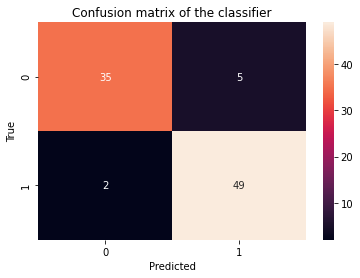

In [38]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [39]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        40
           1       0.91      0.96      0.93        51

    accuracy                           0.92        91
   macro avg       0.93      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



# KNN Classifier :
K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem.

KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). 

Classification is done by a majority vote to its neighbors.

### Standard Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaler.fit(df.drop('target',axis=1))
scaled_features = scaler.transform(df.drop('target',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])


### Splitting Train and Test data

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,df['target'],
                                                    test_size=0.30)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [45]:
accuracy_rate = []

for i in range(1,41):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['target'],cv=10)
    accuracy_rate.append(score.mean())


Text(0, 0.5, 'Accuracy Rate')

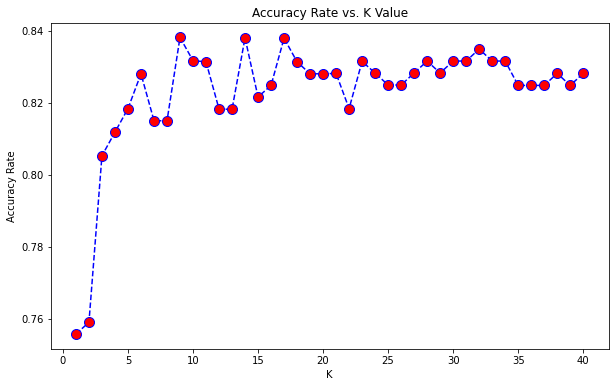

In [46]:
plt.figure(figsize=(10,6))

plt.plot(range(1,41),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

### Initialize Model

In [47]:
knn = KNeighborsClassifier(n_neighbors=31)

### Fitting train data into model

In [48]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=31)

### Predicting Accuracy

In [49]:
pred = knn.predict(X_test)
accuracy_score(Y_test, pred)


0.8351648351648352

### Confusion Matrix

[[24  8]
 [ 7 52]]


Text(33.0, 0.5, 'True')

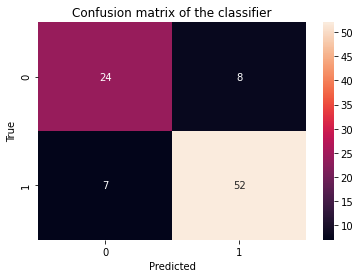

In [50]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(Y_test, pred)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [51]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.87      0.88      0.87        59

    accuracy                           0.84        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.84      0.83        91



# Random Forest Classifier :
RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.

For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.

Final prediction can be a function of all the predictions made by the individual learners.

In case of regression problem, the final prediction can be mean of all the predictions.

There are some parameters worth exploring with the sklearn RandomForestClassifier:
n_estimators
max_features

n_estimators = ususally bigger the forest the better, there is small chance of overfitting here. The more estimators you give it, the better it will do. We will use the value of 600.

max depth of each tree (default none, leading to full tree) - reduction of the maximum depth helps fighting with overfitting. We will limit at 2.


### Splitting Train and Test data

In [52]:

from sklearn.model_selection import train_test_split

In [53]:
x = df.drop('target',axis=1)
y = df['target']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier

### Initialize model

In [56]:
rf= RandomForestClassifier(n_estimators =600, random_state=42,max_depth=2) 

### Fitting train data into model

In [57]:
rf.fit(x_train,y_train) 


RandomForestClassifier(max_depth=2, n_estimators=600, random_state=42)

### Predicting Accuracy

In [58]:
pred = rf.predict(x_test)
accuracy_score(y_test, pred)

0.8791208791208791

### Confusion Matrix

[[34  7]
 [ 4 46]]


Text(33.0, 0.5, 'True')

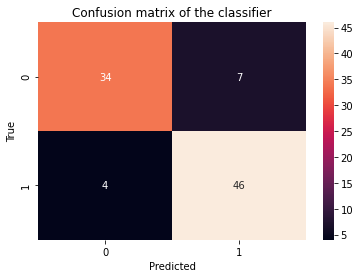

In [59]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, pred)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [60]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.87      0.92      0.89        50

    accuracy                           0.88        91
   macro avg       0.88      0.87      0.88        91
weighted avg       0.88      0.88      0.88        91



### Conclusion :
After trying and testing 3 different algorithms, the best accuracy on the dataset is achieved by Logistic Regression (92.30%), followed by RandomForest (87.91%) and KNN Classifier (83.51%)